# CytoTable mise en place

This notebook includes a quick demonstration of CytoTable to help you understand the basics of using the package and the biological basis of each step.

The name of the notebook comes from the french _mise en place_:
> "Mise en place (French pronunciation: [mi zɑ̃ ˈplas]) is a French culinary phrase which means "putting in place"
> or "gather". It refers to the setup required before cooking, and is often used in professional kitchens to
> refer to organizing and arranging the ingredients ..."
> - [Wikipedia](https://en.wikipedia.org/wiki/Mise_en_place)

In [29]:
import pathlib
from collections import Counter

import pandas as pd
import pyarrow.parquet as pq
from IPython.display import Image, display
from PIL import Image

import cytotable

# setup variables for use throughout the notebook
source_path = "../../../tests/data/cellprofiler/examplehuman"
dest_path = "./example.parquet"

In [19]:
# remove the dest_path if it's present
if pathlib.Path(dest_path).is_file():
    pathlib.Path(dest_path).unlink()

In [20]:
# show the files we will use as source data with CytoTable
list(pathlib.Path(source_path).glob("*"))

[PosixPath('../../../tests/data/cellprofiler/examplehuman/Experiment.csv'),
 PosixPath('../../../tests/data/cellprofiler/examplehuman/PH3.csv'),
 PosixPath('../../../tests/data/cellprofiler/examplehuman/Cytoplasm.csv'),
 PosixPath('../../../tests/data/cellprofiler/examplehuman/Image.csv'),
 PosixPath('../../../tests/data/cellprofiler/examplehuman/ExampleHuman.cppipe'),
 PosixPath('../../../tests/data/cellprofiler/examplehuman/AS_09125_050116030001_D03f00d0_Overlay.png'),
 PosixPath('../../../tests/data/cellprofiler/examplehuman/AS_09125_050116030001_D03f00d0.tif'),
 PosixPath('../../../tests/data/cellprofiler/examplehuman/AS_09125_050116030001_D03f00d1.tif'),
 PosixPath('../../../tests/data/cellprofiler/examplehuman/Nuclei.csv'),
 PosixPath('../../../tests/data/cellprofiler/examplehuman/AS_09125_050116030001_D03f00d2.tif'),
 PosixPath('../../../tests/data/cellprofiler/examplehuman/Cells.csv')]


Image with stain: DNA


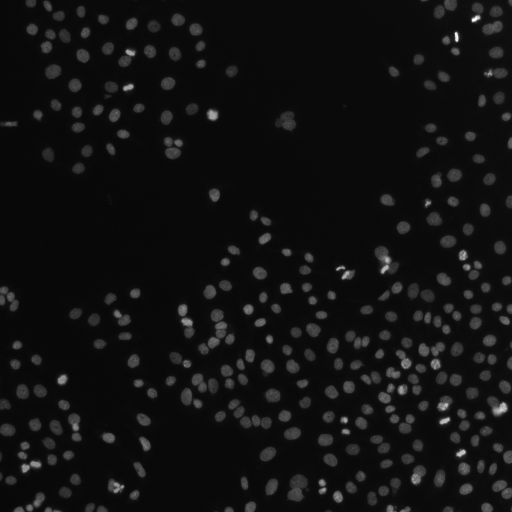


Image with stain: PH3


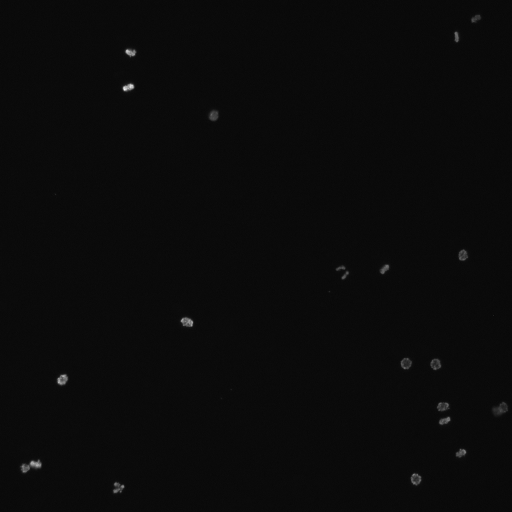


Image with stain: Cells


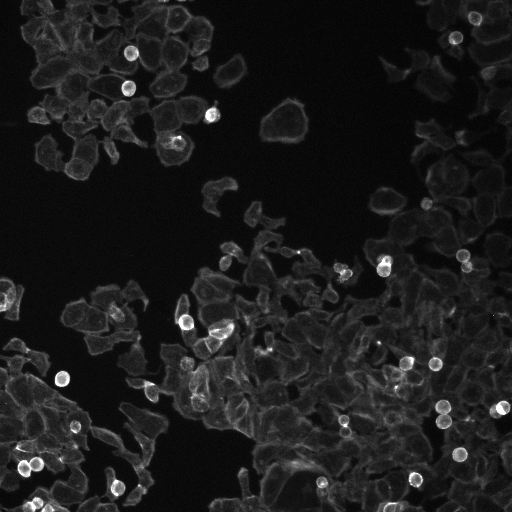

In [35]:
# display the images we will gather features from
image_name_map = {"d0.tif": "DNA", "d1.tif": "PH3", "d2.tif": "Cells"}

for image in pathlib.Path(source_path).glob("*.tif"):
    stain = ""
    for key, val in image_name_map.items():
        if key in str(image):
            stain = val
    print(f"\nImage with stain: {stain}")
    display(Image.open(image))

Image outlines from segmentation (composite)
Color key: {dark blue: nuclei, light blue: cells, yellow: PH3}


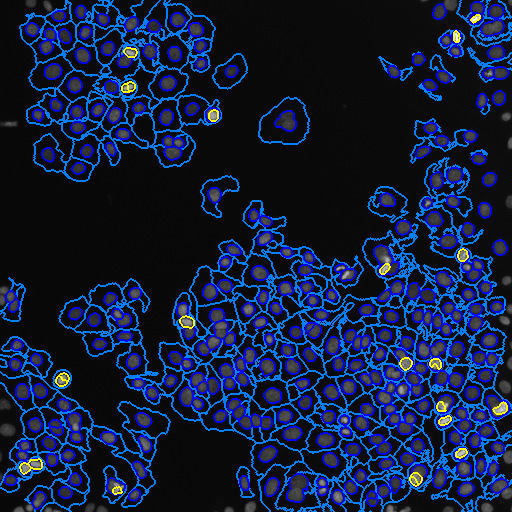

In [27]:
# show the segmentations through an overlay with outlines
for image in pathlib.Path(source_path).glob("*Overlay.png"):
    print(f"Image outlines from segmentation (composite)")
    print("Color key: {dark blue: nuclei, light blue: cells, yellow: PH3}")
    display(Image.open(image))

In [34]:
for profiles in pathlib.Path(source_path).glob("*.csv"):
    print(f"\nProfiles from CellProfiler: {profiles}")
    display(pd.read_csv(profiles).head())


Profiles from CellProfiler: ../../../tests/data/cellprofiler/examplehuman/Experiment.csv


,Key,Value
0,CellProfiler_Version,4.0.6
1,ChannelType_DNA,Grayscale
2,ChannelType_PH3,Grayscale
3,ChannelType_cellbody,Grayscale
4,ImageSet_Zip_Dictionary,b'eG1sMS4wImNvP09NRXd3Lm9wLmhtL09NRS0+PEltYWdl...



Profiles from CellProfiler: ../../../tests/data/cellprofiler/examplehuman/PH3.csv


,ImageNumber,ObjectNumber,Location_Center_X,Location_Center_Y,Location_Center_Z,Number_Object_Number,Parent_Nuclei
0,1,1,475.232558,18.162791,0,1,7
1,1,2,456.096154,36.326923,0,2,17
2,1,3,130.119565,51.967391,0,3,25
3,1,4,130.660714,85.982143,0,4,41
4,1,5,124.891304,87.913043,0,5,41



Profiles from CellProfiler: ../../../tests/data/cellprofiler/examplehuman/Cytoplasm.csv


,ImageNumber,ObjectNumber,AreaShape_Area,AreaShape_BoundingBoxArea,AreaShape_BoundingBoxMaximum_X,AreaShape_BoundingBoxMaximum_Y,AreaShape_BoundingBoxMinimum_X,AreaShape_BoundingBoxMinimum_Y,AreaShape_Center_X,AreaShape_Center_Y,...,Location_Center_Y,Location_MaxIntensity_X_DNA,Location_MaxIntensity_X_PH3,Location_MaxIntensity_Y_DNA,Location_MaxIntensity_Y_PH3,Location_MaxIntensity_Z_DNA,Location_MaxIntensity_Z_PH3,Number_Object_Number,Parent_Cells,Parent_Nuclei
0,1,1,288,580,486,20,457,0,468.621528,7.739583,...,7.739583,478.0,478.0,12.0,13.0,0.0,0.0,1,1,1
1,1,2,256,475,511,19,486,0,496.113281,9.058594,...,9.058594,493.0,503.0,16.0,16.0,0.0,0.0,2,2,2
2,1,3,52,195,446,19,433,4,439.000000,11.269231,...,11.269231,443.0,433.0,8.0,12.0,0.0,0.0,3,3,3
3,1,4,466,972,103,27,67,0,81.849785,9.175966,...,9.175966,83.0,73.0,15.0,19.0,0.0,0.0,4,4,4
4,1,5,296,729,72,27,45,0,59.597973,15.952703,...,15.952703,62.0,66.0,12.0,0.0,0.0,0.0,5,5,5



Profiles from CellProfiler: ../../../tests/data/cellprofiler/examplehuman/Image.csv


,Channel_DNA,Channel_PH3,Channel_cellbody,Count_Cells,Count_Cytoplasm,Count_Nuclei,Count_PH3,ExecutionTime_01Images,ExecutionTime_02Metadata,ExecutionTime_03NamesAndTypes,...,Threshold_WeightedVariance_Cells,Threshold_WeightedVariance_Nuclei,Threshold_WeightedVariance_PH3,URL_DNA,URL_OrigOverlay,URL_PH3,URL_cellbody,Width_DNA,Width_PH3,Width_cellbody
0,-1,-1,-1,289.0,289.0,289.0,22.0,0.0,0.0,5.08,...,0.334916,0.130342,0.018841,file:/usr/local/src/ExampleHuman/images/AS_091...,file:output/ExampleHuman/AS_09125_050116030001...,file:/usr/local/src/ExampleHuman/images/AS_091...,file:/usr/local/src/ExampleHuman/images/AS_091...,512,512,512



Profiles from CellProfiler: ../../../tests/data/cellprofiler/examplehuman/Nuclei.csv


,ImageNumber,ObjectNumber,AreaShape_Area,AreaShape_BoundingBoxArea,AreaShape_BoundingBoxMaximum_X,AreaShape_BoundingBoxMaximum_Y,AreaShape_BoundingBoxMinimum_X,AreaShape_BoundingBoxMinimum_Y,AreaShape_Center_X,AreaShape_Center_Y,...,Location_Center_X,Location_Center_Y,Location_Center_Z,Location_MaxIntensity_X_DNA,Location_MaxIntensity_X_PH3,Location_MaxIntensity_Y_DNA,Location_MaxIntensity_Y_PH3,Location_MaxIntensity_Z_DNA,Location_MaxIntensity_Z_PH3,Number_Object_Number
0,1,1,131,156,484,14,471,2,477.099237,7.580153,...,477.099237,7.580153,0,477.0,478.0,8.0,13.0,0.0,0.0,1
1,1,2,152,195,504,18,489,5,495.750000,11.098684,...,495.750000,11.098684,0,495.0,502.0,9.0,14.0,0.0,0.0,2
2,1,3,147,195,446,19,433,4,438.959184,11.374150,...,438.959184,11.374150,0,440.0,439.0,11.0,16.0,0.0,0.0,3
3,1,4,98,130,86,18,76,5,80.459184,11.163265,...,80.459184,11.163265,0,80.0,81.0,13.0,10.0,0.0,0.0,4
4,1,5,104,130,65,21,52,11,58.423077,15.509615,...,58.423077,15.509615,0,62.0,52.0,14.0,15.0,0.0,0.0,5



Profiles from CellProfiler: ../../../tests/data/cellprofiler/examplehuman/Cells.csv


,ImageNumber,ObjectNumber,AreaShape_Area,AreaShape_BoundingBoxArea,AreaShape_BoundingBoxMaximum_X,AreaShape_BoundingBoxMaximum_Y,AreaShape_BoundingBoxMinimum_X,AreaShape_BoundingBoxMinimum_Y,AreaShape_Center_X,AreaShape_Center_Y,...,Location_Center_Y,Location_Center_Z,Location_MaxIntensity_X_DNA,Location_MaxIntensity_X_PH3,Location_MaxIntensity_Y_DNA,Location_MaxIntensity_Y_PH3,Location_MaxIntensity_Z_DNA,Location_MaxIntensity_Z_PH3,Number_Object_Number,Parent_Nuclei
0,1,1,372,580,486,20,457,0,470.543011,7.693548,...,7.693548,0,477.0,479.0,8.0,13.0,0.0,0.0,1,1
1,1,2,356,475,511,19,486,0,495.994382,9.632022,...,9.632022,0,495.0,497.0,9.0,3.0,0.0,0.0,2,2
2,1,3,147,195,446,19,433,4,438.959184,11.374150,...,11.374150,0,440.0,435.0,11.0,8.0,0.0,0.0,3,3
3,1,4,523,972,103,27,67,0,81.695985,9.391969,...,9.391969,0,80.0,86.0,13.0,7.0,0.0,0.0,4,4
4,1,5,358,729,72,27,45,0,59.416201,15.877095,...,15.877095,0,61.0,66.0,14.0,0.0,0.0,0.0,5,5


In [4]:
%%time

# run cytotable convert
result = cytotable.convert(
    source_path=source_path,
    dest_path=dest_path,
    # specify a destination data format type
    dest_datatype="parquet",
    # specify a preset which enables quick use of common input file formats
    preset="cellprofiler_csv",
)
result.name

CPU times: user 327 ms, sys: 201 ms, total: 528 ms
Wall time: 22.4 s


'example.parquet'

In [5]:
# show the table head using pandas
pq.read_table(source=result).to_pandas().head()

,Metadata_ImageNumber,Metadata_Cells_Parent_Nuclei,Metadata_Cytoplasm_Parent_Cells,Metadata_Cytoplasm_Parent_Nuclei,Metadata_ObjectNumber,Image_FileName_DNA,Image_FileName_OrigOverlay,Image_FileName_PH3,Image_FileName_cellbody,Cytoplasm_AreaShape_Area,...,Nuclei_Location_Center_X,Nuclei_Location_Center_Y,Nuclei_Location_Center_Z,Nuclei_Location_MaxIntensity_X_DNA,Nuclei_Location_MaxIntensity_X_PH3,Nuclei_Location_MaxIntensity_Y_DNA,Nuclei_Location_MaxIntensity_Y_PH3,Nuclei_Location_MaxIntensity_Z_DNA,Nuclei_Location_MaxIntensity_Z_PH3,Nuclei_Number_Object_Number
0,1,1,1,1,1,AS_09125_050116030001_D03f00d0.tif,AS_09125_050116030001_D03f00d0_Overlay.png,AS_09125_050116030001_D03f00d1.tif,AS_09125_050116030001_D03f00d2.tif,288,...,477.099237,7.580153,0,477.0,478.0,8.0,13.0,0.0,0.0,1
1,1,2,2,2,2,AS_09125_050116030001_D03f00d0.tif,AS_09125_050116030001_D03f00d0_Overlay.png,AS_09125_050116030001_D03f00d1.tif,AS_09125_050116030001_D03f00d2.tif,256,...,495.750000,11.098684,0,495.0,502.0,9.0,14.0,0.0,0.0,2
2,1,3,3,3,3,AS_09125_050116030001_D03f00d0.tif,AS_09125_050116030001_D03f00d0_Overlay.png,AS_09125_050116030001_D03f00d1.tif,AS_09125_050116030001_D03f00d2.tif,52,...,438.959184,11.374150,0,440.0,439.0,11.0,16.0,0.0,0.0,3
3,1,4,4,4,4,AS_09125_050116030001_D03f00d0.tif,AS_09125_050116030001_D03f00d0_Overlay.png,AS_09125_050116030001_D03f00d1.tif,AS_09125_050116030001_D03f00d2.tif,466,...,80.459184,11.163265,0,80.0,81.0,13.0,10.0,0.0,0.0,4
4,1,5,5,5,5,AS_09125_050116030001_D03f00d0.tif,AS_09125_050116030001_D03f00d0_Overlay.png,AS_09125_050116030001_D03f00d1.tif,AS_09125_050116030001_D03f00d2.tif,296,...,58.423077,15.509615,0,62.0,52.0,14.0,15.0,0.0,0.0,5


In [6]:
# show metadata for the result file
pq.read_metadata(result)

  created_by: parquet-cpp-arrow version 20.0.0
  num_columns: 312
  num_rows: 289
  num_row_groups: 1
  format_version: 2.6
  serialized_size: 87762

In [7]:
# show schema metadata which includes CytoTable information
# note: this information will travel with the file.
pq.read_schema(result).metadata

{b'data-producer': b'https://github.com/cytomining/CytoTable',
 b'data-producer-version': b'0.0.15.post15.dev0+c2a924c'}

In [8]:
# show schema column name summaries
print("Column name prefix counts:")
dict(Counter(w.split("_", 1)[0] for w in pq.read_schema(result).names))

Column name prefix counts:


{'Metadata': 5, 'Image': 4, 'Cytoplasm': 99, 'Cells': 101, 'Nuclei': 103}

In [9]:
# show full schema details
pq.read_schema(result)

Metadata_ImageNumber: int64
Metadata_Cells_Parent_Nuclei: int64
Metadata_Cytoplasm_Parent_Cells: int64
Metadata_Cytoplasm_Parent_Nuclei: int64
Metadata_ObjectNumber: int64
Image_FileName_DNA: string
Image_FileName_OrigOverlay: string
Image_FileName_PH3: string
Image_FileName_cellbody: string
Cytoplasm_AreaShape_Area: int64
Cytoplasm_AreaShape_BoundingBoxArea: int64
Cytoplasm_AreaShape_BoundingBoxMaximum_X: int64
Cytoplasm_AreaShape_BoundingBoxMaximum_Y: int64
Cytoplasm_AreaShape_BoundingBoxMinimum_X: int64
Cytoplasm_AreaShape_BoundingBoxMinimum_Y: int64
Cytoplasm_AreaShape_Center_X: double
Cytoplasm_AreaShape_Center_Y: double
Cytoplasm_AreaShape_Compactness: double
Cytoplasm_AreaShape_Eccentricity: double
Cytoplasm_AreaShape_EquivalentDiameter: double
Cytoplasm_AreaShape_EulerNumber: int64
Cytoplasm_AreaShape_Extent: double
Cytoplasm_AreaShape_FormFactor: double
Cytoplasm_AreaShape_MajorAxisLength: double
Cytoplasm_AreaShape_MaxFeretDiameter: double
Cytoplasm_AreaShape_MaximumRadius: d